### Optimizing Advertising Spend with Data Science and Machine Learning

# Import Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import joblib



# Import Dataset

In [2]:
advert_dataset= pd.read_csv("online_advertising_performance_data.csv")
advert_dataset

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,NaN,NaN
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,NaN,NaN
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,NaN,NaN
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,NaN,NaN
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15403,April,1,camp 1,Low,160 x 600,ghi,16,0.0249,0,0.0000,0,0.0000,NaN,NaN
15404,April,1,camp 1,Low,160 x 600,mno,2234,0.4044,10,1.8347,3,101.7494,NaN,NaN
15405,June,29,camp 1,High,800 x 250,ghi,1,0.0157,0,0.0000,0,0.0000,NaN,NaN
15406,June,29,camp 1,High,800 x 250,mno,4,0.0123,0,0.0000,0,0.0000,NaN,NaN


# Data Preprocessing

In [3]:
advert_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

>**Drop irrelevant columns -  "Unnamed: 12","Unnamed: 13"**

In [4]:
advert_dataset.drop(columns =["Unnamed: 12","Unnamed: 13" ], inplace = True)
advert_dataset

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
15403,April,1,camp 1,Low,160 x 600,ghi,16,0.0249,0,0.0000,0,0.0000
15404,April,1,camp 1,Low,160 x 600,mno,2234,0.4044,10,1.8347,3,101.7494
15405,June,29,camp 1,High,800 x 250,ghi,1,0.0157,0,0.0000,0,0.0000
15406,June,29,camp 1,High,800 x 250,mno,4,0.0123,0,0.0000,0,0.0000


**Check data information again**

In [5]:
advert_dataset.info()  # Now irrelevant column has been removed, but it seems thaere are null items in'placement' column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [6]:
advert_dataset.isnull().sum() #inspect for null data in all columns

month                        0
day                          0
campaign_number              0
user_engagement              0
banner                       0
placement                  413
displays                     0
cost                         0
clicks                       0
revenue                      0
post_click_conversions       0
post_click_sales_amount      0
dtype: int64

In [7]:
# Handle missing values, since placement is quite important to the analysis and the volume of missing data is about 3% we can drop them 
advert_dataset.dropna(subset=['placement'], inplace=True)

In [8]:
advert_dataset.isnull().sum() #inspect for null data in all columns

month                      0
day                        0
campaign_number            0
user_engagement            0
banner                     0
placement                  0
displays                   0
cost                       0
clicks                     0
revenue                    0
post_click_conversions     0
post_click_sales_amount    0
dtype: int64

In [10]:
advert_dataset.duplicated().sum() # Check for duplicates

5

In [11]:
# Display duplicated rows
duplicated_rows = advert_dataset[advert_dataset.duplicated()]
duplicated_rows


,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
15403,April,1,camp 1,Low,160 x 600,ghi,16,0.0249,0,0.0000,0,0.0000
15404,April,1,camp 1,Low,160 x 600,mno,2234,0.4044,10,1.8347,3,101.7494
15405,June,29,camp 1,High,800 x 250,ghi,1,0.0157,0,0.0000,0,0.0000
15406,June,29,camp 1,High,800 x 250,mno,4,0.0123,0,0.0000,0,0.0000
15407,June,29,camp 3,High,240 x 400,def,1209,0.3184,2,0.1115,3,110.4224


In [12]:
advert_dataset.drop_duplicates(inplace = True)

In [13]:
advert_dataset.duplicated().sum() # Check duplicated have been removed

0

# Exploratory Data Analysis EDA

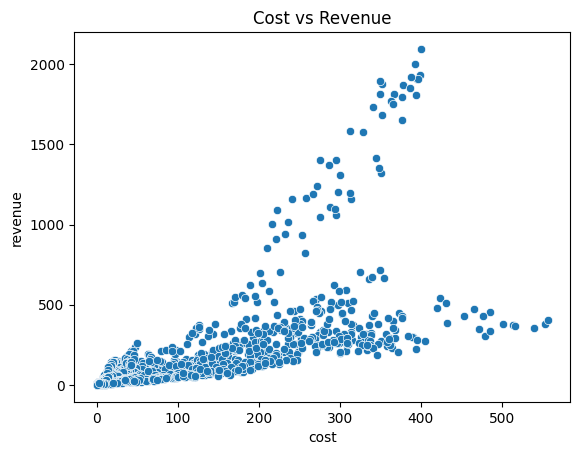

In [14]:
# Visualizations
sns.scatterplot(x='cost', y='revenue', data=advert_dataset)
plt.title("Cost vs Revenue")
plt.show()

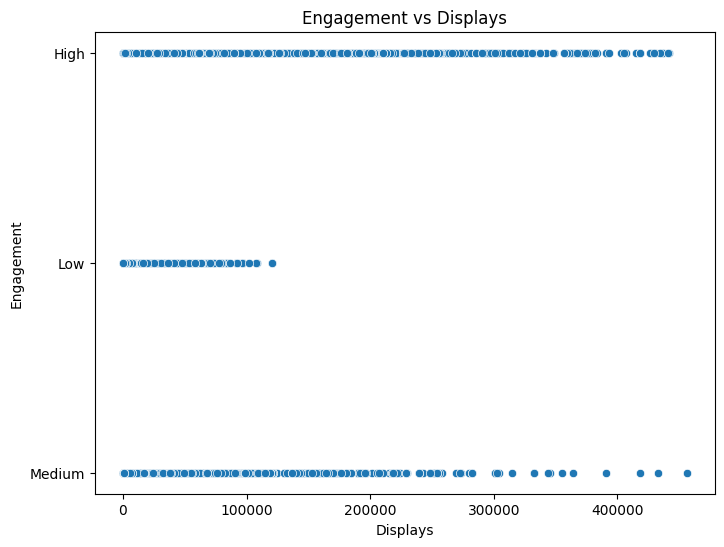

In [136]:
# Engagement vs Display (Scatter Plot for Numerical Relationship)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='displays', y='user_engagement', data=advert_dataset)
plt.title("Engagement vs Displays")
plt.xlabel("Displays")
plt.ylabel("Engagement")
plt.show()

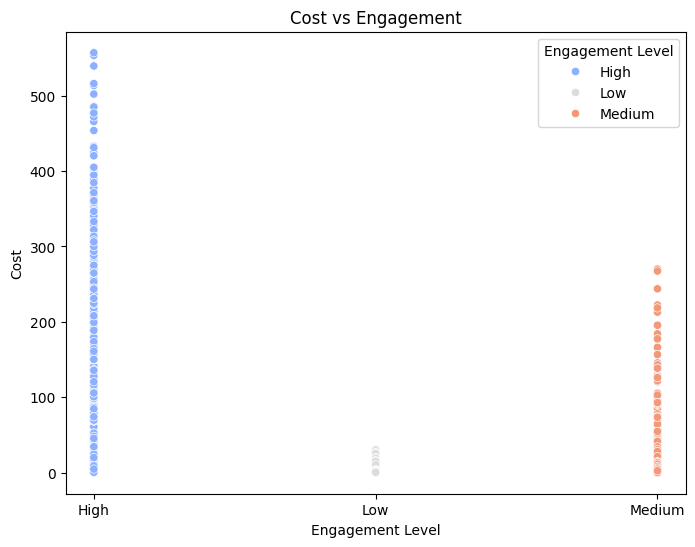

In [15]:
# Scatter plot: Cost vs Engagement
plt.figure(figsize=(8, 6))
sns.scatterplot(x='user_engagement', y='cost', data=advert_dataset, hue='user_engagement', palette="coolwarm")
plt.title("Cost vs Engagement")
plt.xlabel("Engagement Level")
plt.ylabel("Cost")
plt.legend(title="Engagement Level")
plt.show()

# Inferential Statistics

In [16]:
# Feature Engineering: Create new metrics essential for adavertsing spend analysis 
advert_dataset['CPC'] = advert_dataset['cost'] / (advert_dataset['clicks'] + 1)
advert_dataset['CTR'] = advert_dataset['clicks'] / (advert_dataset['displays'] + 1)
advert_dataset['RPC'] = advert_dataset['revenue'] / (advert_dataset['clicks'] + 1)
advert_dataset['CPPCSA'] = advert_dataset['cost'] / (advert_dataset['post_click_sales_amount'] + 1)
# Feature Engineering: Create ROI (Yield) column from post-click sales and cost
advert_dataset['ROI'] = advert_dataset['post_click_sales_amount'] / (advert_dataset['cost'] + 1)  # Adding 1 to prevent division by zero

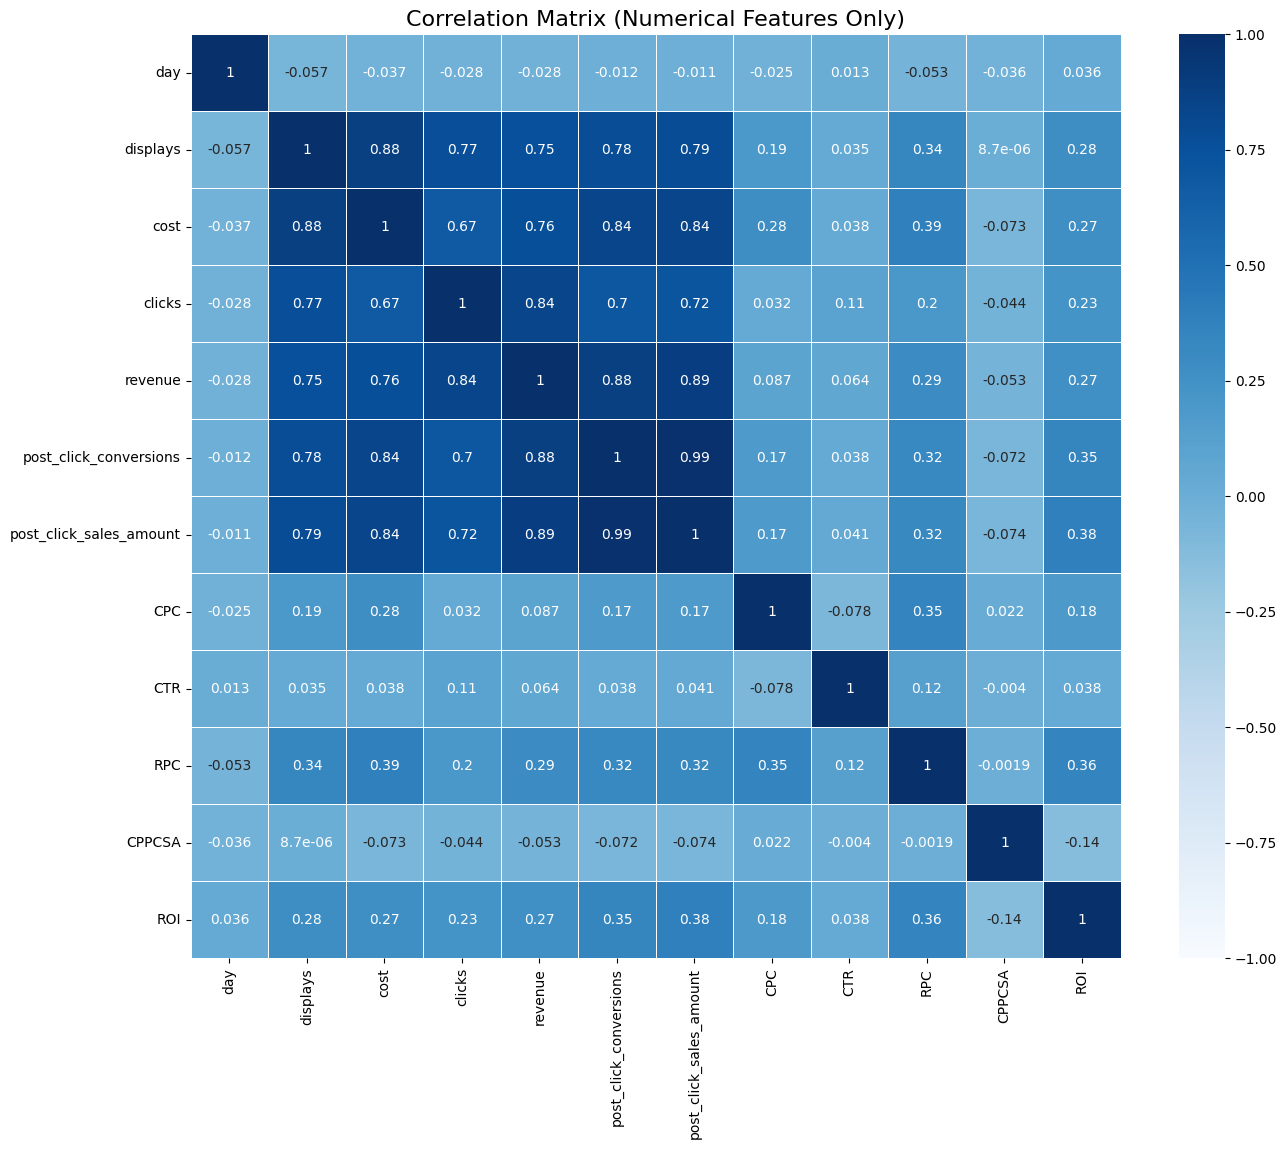

In [17]:
# Filter for numerical columns only
numerical_columns = advert_dataset.select_dtypes(include=[np.number])

# Plot the correlation heatmap 
plt.figure(figsize=(15, 12))  
sns.heatmap(
    numerical_columns.corr(),
    annot=True,
    cmap="Blues",  # Using Blue shades
    vmin=-1, vmax=1,  # Ensuring the full range of correlation is displayed
    linewidths=0.5  # Adding lines for better separation
)
plt.title("Correlation Matrix (Numerical Features Only)", fontsize=16)
plt.show()

C:\Users\adeye\AppData\Local\Temp\ipykernel_20328\3796019172.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='placement', y='yield_placement', data=advert_dataset, palette="Oranges_d")


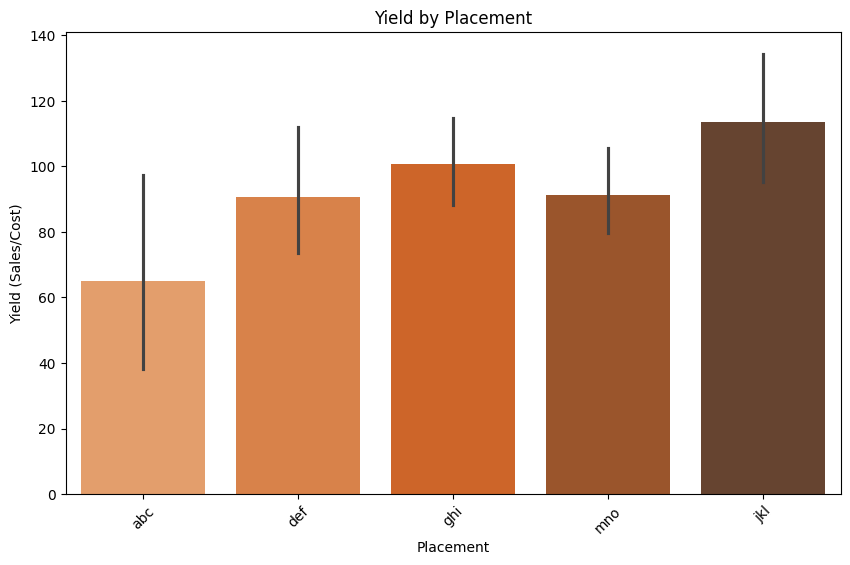

In [18]:
#Plot yield vs placement
advert_dataset['yield_placement'] = advert_dataset['post_click_sales_amount'] / advert_dataset['cost']
plt.figure(figsize=(10, 6))
sns.barplot(x='placement', y='yield_placement', data=advert_dataset, palette="Oranges_d")
plt.title("Yield by Placement")
plt.xlabel("Placement")
plt.ylabel("Yield (Sales/Cost)")
plt.xticks(rotation=45)
plt.show()


C:\Users\adeye\AppData\Local\Temp\ipykernel_20328\2429286374.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='campaign_number', y='yield_campaign', data=advert_dataset, palette="Purples_d")


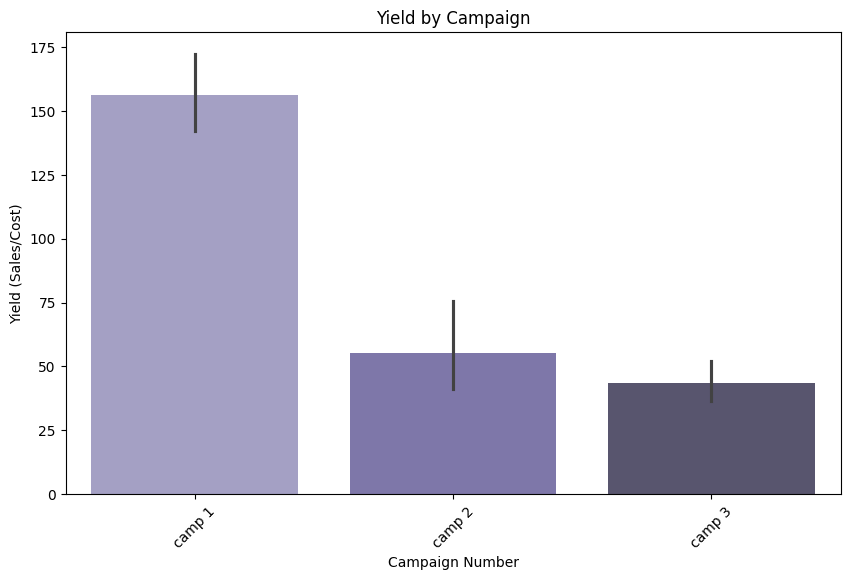

In [20]:
# Calculate yield by campaign
advert_dataset['yield_campaign'] = advert_dataset['post_click_sales_amount'] / advert_dataset['cost']

# Plot Yield by Campaign advert_dataset['yield_campaign'] = advert_dataset['post_click_sales_amount'] / advert_dataset['cost']
plt.figure(figsize=(10, 6))
sns.barplot(x='campaign_number', y='yield_campaign', data=advert_dataset, palette="Purples_d")
plt.title("Yield by Campaign")
plt.xlabel("Campaign Number")
plt.ylabel("Yield (Sales/Cost)")
plt.xticks(rotation=45)
plt.show()

C:\Users\adeye\AppData\Local\Temp\ipykernel_19180\1451811376.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




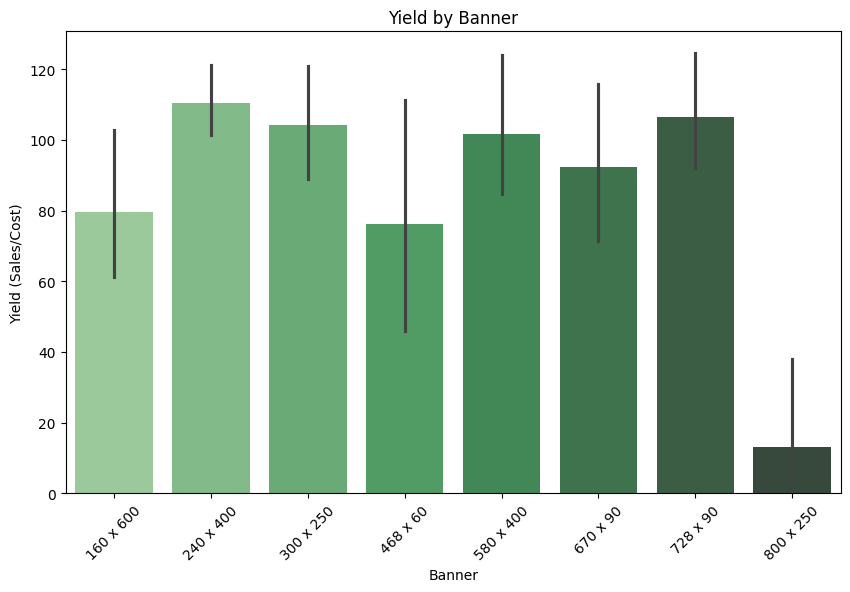

In [ ]:
# Plot Yield by Banner
advert_dataset['yield_banner'] = advert_dataset['post_click_sales_amount'] / advert_dataset['cost']
plt.figure(figsize=(10, 6))
sns.barplot(x='banner', y='yield_banner', data=advert_dataset, palette="Greens_d")
plt.title("Yield by Banner")
plt.xlabel("Banner")
plt.ylabel("Yield (Sales/Cost)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Create a Plotly scatter plot to visualize Cost vs Post Click Sales Amount by Campaign
fig = px.scatter(advert_dataset, x='cost', y='post_click_sales_amount', color='campaign_number',
                 title="Cost vs Yield (Post Click Sales Amount) by Campaign",
                 labels={"cost": "Cost", "post_click_sales_amount": "Post Click Sales Amount", "campaign": "Campaign"},
                 hover_data=['placement', 'banner', 'user_engagement'])

# Update layout for better readability
fig.update_layout(
    xaxis_title="Cost",
    yaxis_title="Post Click Sales Amount",
    legend_title="Campaign",
    template="plotly_dark"
)

# Show the plot
fig.show()


In [44]:
advert_dataset

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,display_bins,CPC,CTR,RPC,CPPCSA
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,"(-455.986, 45598.6]",0.006000,0.000000,0.000000,0.006000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,"(-455.986, 45598.6]",0.168443,0.007833,0.182212,0.013571
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,"(-455.986, 45598.6]",0.173776,0.010747,0.182246,0.011060
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,"(136795.8, 182394.4]",0.120687,0.010487,0.183334,0.008807
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,"(-455.986, 45598.6]",0.033500,0.001808,0.091700,0.067000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15403,April,1,camp 1,Low,160 x 600,ghi,16,0.0249,0,0.0000,0,0.0000,"(-455.986, 45598.6]",0.024900,0.000000,0.000000,0.024900
15404,April,1,camp 1,Low,160 x 600,mno,2234,0.4044,10,1.8347,3,101.7494,"(-455.986, 45598.6]",0.036764,0.004474,0.166791,0.003936
15405,June,29,camp 1,High,800 x 250,ghi,1,0.0157,0,0.0000,0,0.0000,"(-455.986, 45598.6]",0.015700,0.000000,0.000000,0.015700
15406,June,29,camp 1,High,800 x 250,mno,4,0.0123,0,0.0000,0,0.0000,"(-455.986, 45598.6]",0.012300,0.000000,0.000000,0.012300


# Descriptive Statistics

In [ ]:

# Group the data by 'placement' and 'campaign', calculating the mean 'post_click_sales_amount' for each combination
placement_campaign_yield = advert_dataset.groupby(['placement', 'campaign_number'])['post_click_sales_amount'].mean().reset_index()

# Create a heatmap using Plotly
fig = px.density_heatmap(placement_campaign_yield, x='placement', y='campaign_number', z='post_click_sales_amount',
                         color_continuous_scale='Viridis', 
                         title="Yield (Post Click Sales Amount) by Placement and Campaign",
                         labels={"placement": "Placement", "campaign": "Campaign", "post_click_sales_amount": "Post Click Sales Amount"})

# Update layout for better readability
fig.update_layout(
    xaxis_title="Placement",
    yaxis_title="Campaign",
    template="plotly_dark"
)

# Show the plot
fig.show()

C:\Users\adeye\AppData\Local\Temp\ipykernel_19180\127617135.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\adeye\AppData\Local\Temp\ipykernel_19180\127617135.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




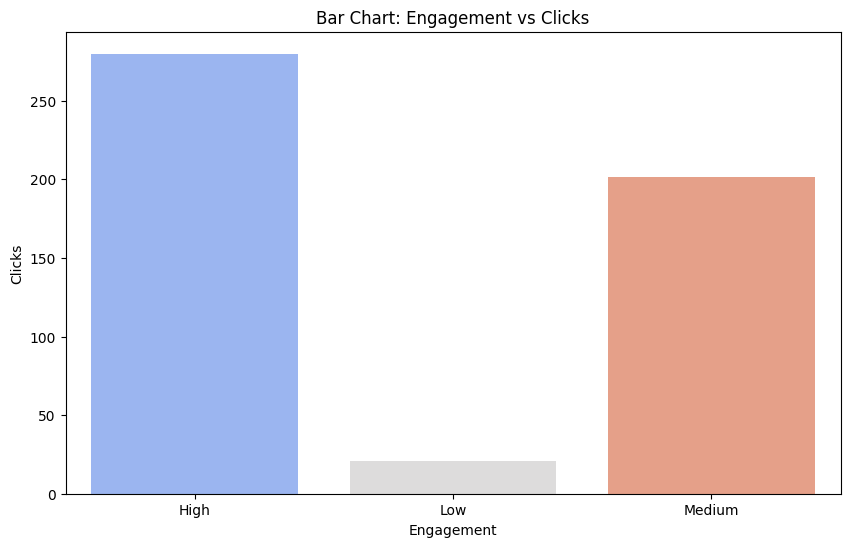

In [152]:
# Bar Chart: Engagement vs Clicks
plt.figure(figsize=(10, 6))
sns.barplot(x='user_engagement', y='clicks', data=advert_dataset, ci=None, palette="coolwarm")
plt.title("Bar Chart: Engagement vs Clicks")
plt.xlabel("Engagement")
plt.ylabel("Clicks")
plt.show()

C:\Users\adeye\AppData\Local\Temp\ipykernel_19180\3731498380.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\adeye\AppData\Local\Temp\ipykernel_19180\3731498380.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




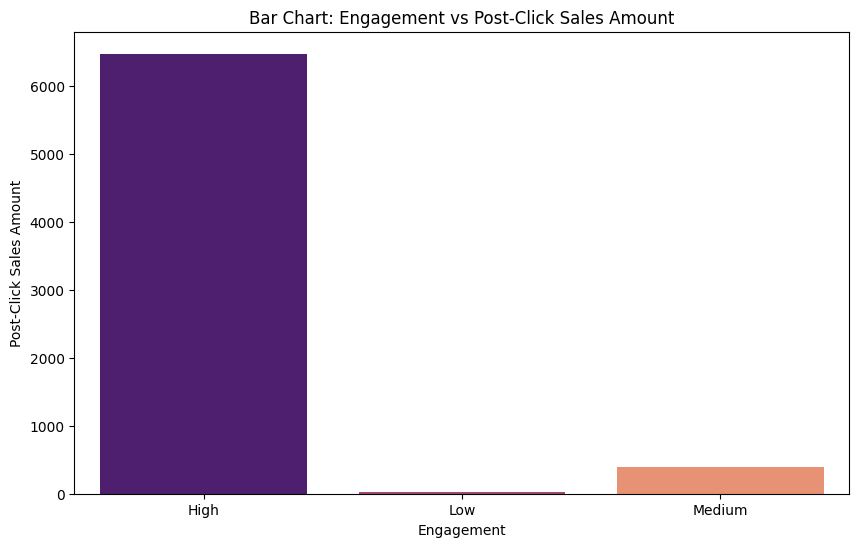

In [153]:
# Bar Chart: Engagement vs Post-Click Sales Amount
plt.figure(figsize=(10, 6))
sns.barplot(x='user_engagement', y='post_click_sales_amount', data=advert_dataset, ci=None, palette="magma")
plt.title("Bar Chart: Engagement vs Post-Click Sales Amount")
plt.xlabel("Engagement")
plt.ylabel("Post-Click Sales Amount")
plt.show()

C:\Users\adeye\AppData\Local\Temp\ipykernel_19180\1485705164.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




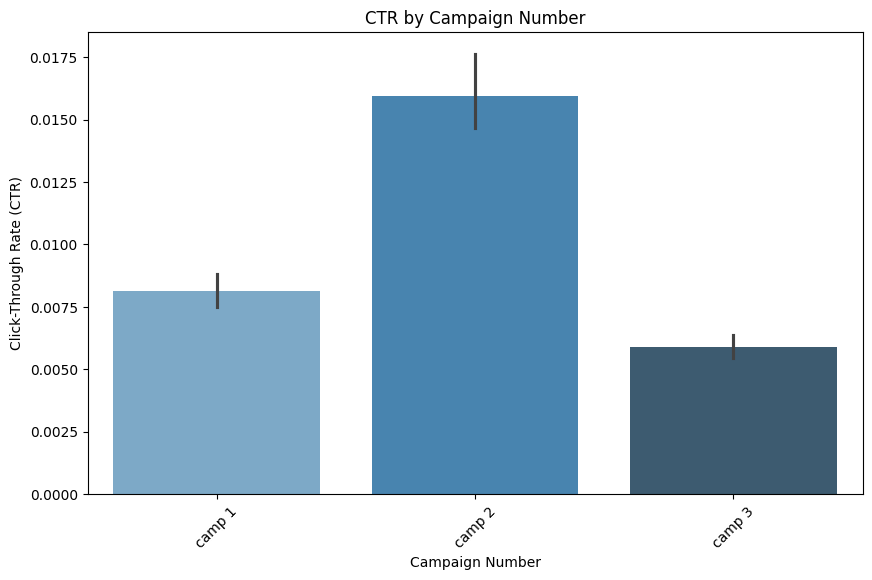

In [ ]:
# Plot CTR by Campaign Number
plt.figure(figsize=(10, 6))
sns.barplot(x='campaign_number', y='CTR', data=advert_dataset, palette="Blues_d")
plt.title("CTR by Campaign Number")
plt.xlabel("Campaign Number")
plt.ylabel("Click-Through Rate (CTR)")
plt.xticks(rotation=45)
plt.show()


In [155]:
# Calculate yield by campaign
advert_dataset['yield_campaign'] = advert_dataset['post_click_sales_amount'] / advert_dataset['cost']


In [156]:
# Descriptive statistics for yield by campaign
yield_stats = advert_dataset.groupby('campaign_number')['yield_campaign'].describe()
print(yield_stats)


                  count        mean         std  min  25%       50%  \
campaign_number                                                       
camp 1           6703.0  156.137071  618.777817  0.0  0.0  9.846603   
camp 2           1550.0   55.418011  341.875353  0.0  0.0  0.000000   
camp 3           6673.0   43.600586  323.312297  0.0  0.0  0.000000   

                        75%           max  
campaign_number                            
camp 1           170.390588  18949.692708  
camp 2            52.855947  11323.188119  
camp 3             0.000000  11028.178082  


C:\Users\adeye\AppData\Local\Temp\ipykernel_19180\257432403.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




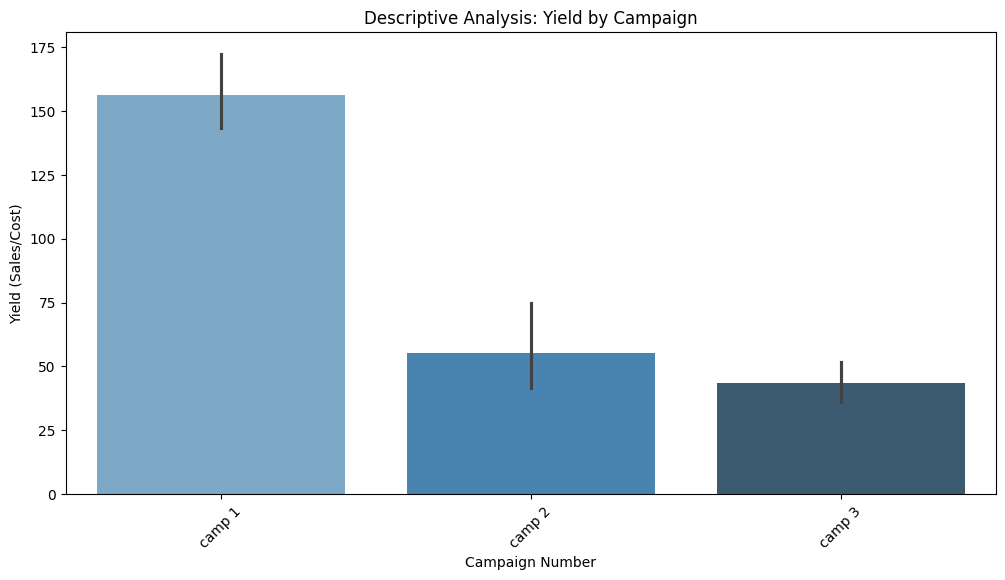

In [157]:
# Descriptive plot: Yield by Campaign (Bar Plot)
plt.figure(figsize=(12, 6))
sns.barplot(x='campaign_number', y='yield_campaign', data=advert_dataset, palette="Blues_d")
plt.title("Descriptive Analysis: Yield by Campaign")
plt.xlabel("Campaign Number")
plt.ylabel("Yield (Sales/Cost)")
plt.xticks(rotation=45)
plt.show()


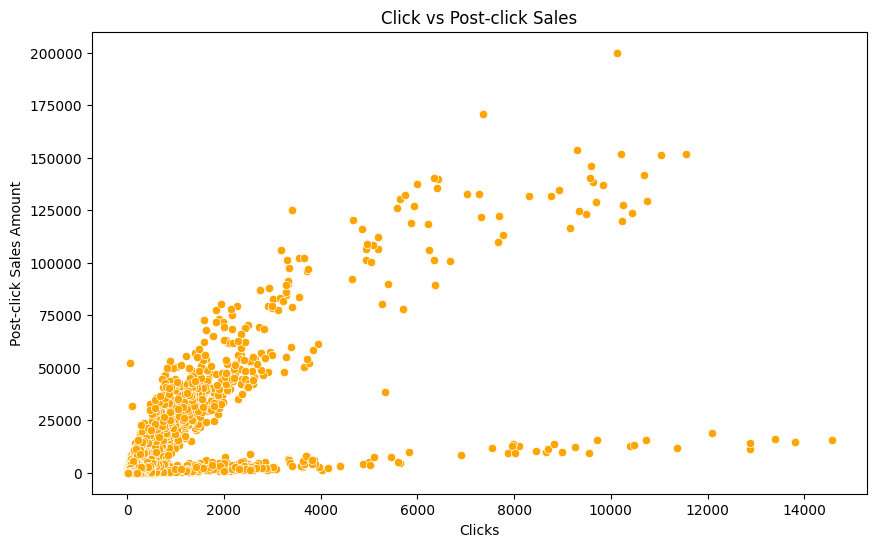

In [158]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='clicks', y='post_click_sales_amount', data=advert_dataset, color='orange')
plt.title("Click vs Post-click Sales")
plt.xlabel("Clicks")
plt.ylabel("Post-click Sales Amount")
plt.show()


C:\Users\adeye\AppData\Local\Temp\ipykernel_19180\77500921.py:11: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\adeye\AppData\Local\Temp\ipykernel_19180\77500921.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\adeye\AppData\Local\Temp\ipykernel_19180\77500921.py:19: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\adeye\AppData\Local\Temp\ipykernel_19180\77500921.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




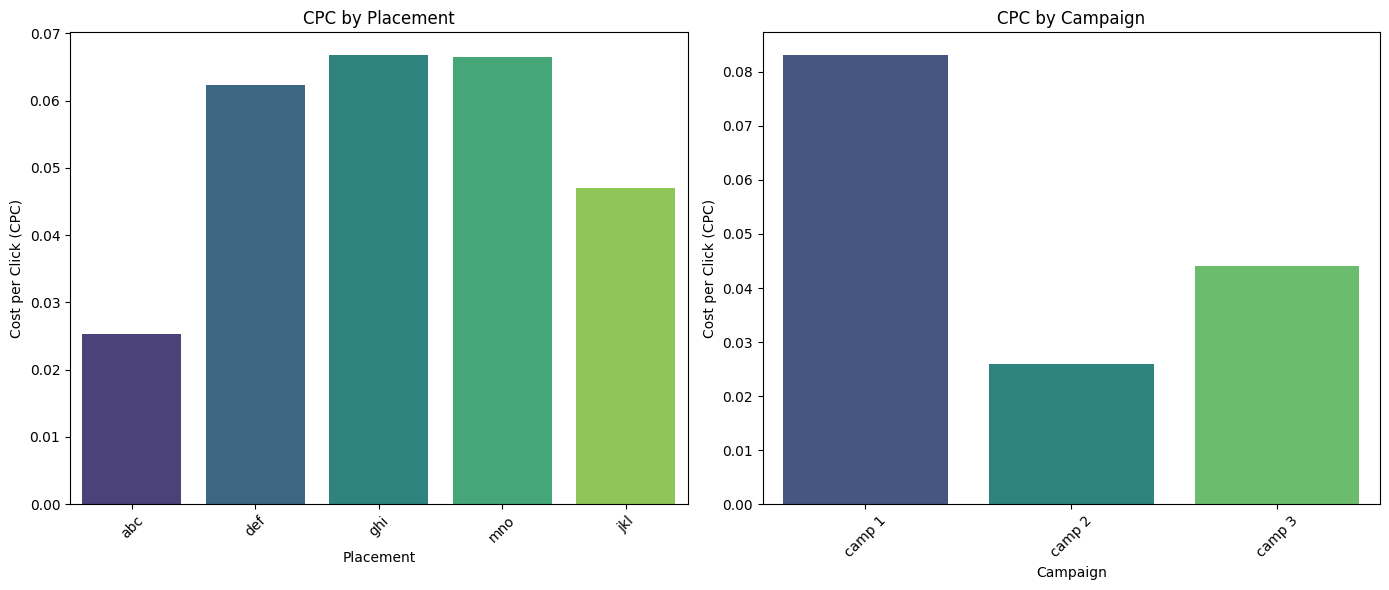

In [ ]:
# Create a new CPC column (Cost per Click)
advert_dataset['CPC'] = advert_dataset['cost'] / (advert_dataset['clicks'] + 1)

# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# CPC by Placement
plt.subplot(1, 2, 1)
sns.barplot(x='placement', y='CPC', data=advert_dataset, ci=None, palette='viridis')
plt.title('CPC by Placement')
plt.xlabel('Placement')
plt.ylabel('Cost per Click (CPC)')
plt.xticks(rotation=45)

# CPC by Campaign
plt.subplot(1, 2, 2)
sns.barplot(x='campaign_number', y='CPC', data=advert_dataset, ci=None, palette='viridis')
plt.title('CPC by Campaign')
plt.xlabel('Campaign')
plt.ylabel('Cost per Click (CPC)')
plt.xticks(rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

# Machine Learning 

# Problem identified 

**Problem Statement:** <br>
In the current advertising landscape, the company faces a significant challenge in optimizing Return on Investment (ROI) across its campaigns and placements. While Campaign 2 has the best Click-Through Rate (CTR), it is Campaign 1 that delivers the highest ROI, indicating a gap between engagement metrics (like CTR) and profitability. Furthermore, although Placement 'ghi' generates the best yield, it is also the most expensive, which puts pressure on cost-effectiveness.

The key problem lies in efficiently allocating advertising spend to achieve higher ROI while maintaining or improving engagement. There is a need to leverage data-driven insights to make more informed decisions about which campaigns and placements to prioritize, in order to maximize post-click sales relative to the cost.

**Objective:**<br>
The objective is to develop a machine learning model that predicts ROI for campaigns and placements based on a variety of features, such as cost, clicks, displays, engagement, and campaign type. By predicting ROI, the company can optimize its advertising strategy, allocate budget more effectively, and ultimately improve profitability. This model will help identify the most cost-effective campaigns and placements, and provide recommendations for adjustments to improve overall ROI.

**Key Goals:**<br>
Understand the factors driving ROI: Investigate which features (e.g., cost, clicks, engagement, placements, etc.) have the most impact on ROI.
Optimize campaign budget allocation: Identify high-performing campaigns and placements to allocate more budget to the most cost-effective options.
Improve cost-effectiveness: Find ways to achieve higher ROI with existing advertising budgets, particularly by optimizing high-cost placements like GHI.<br>
**Outcome:**<br>
By using predictive models to forecast ROI, the company will be able to:<br>

Improve ROI by reallocating resources to the most efficient campaigns and placements.
Maximize yield while controlling costs.
Make data-driven decisions that lead to higher profitability and a more efficient advertising spend strategy.

# Machine Learning Model Building

In [107]:
advert_dataset


,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,...,CTR,RPC,CPPCSA,yield_campaign,yield_placement,yield_banner,ROI,campaign_encoded,placement_encoded,user_engagement_encoded
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,...,0.000000,0.000000,0.006000,0.000000,0.000000,0.000000,0.000000,0,0,0
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,...,0.007833,0.182212,0.013571,73.647627,73.647627,73.647627,70.996753,0,1,0
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,...,0.010747,0.182246,0.011060,90.381015,90.381015,90.381015,87.224195,0,2,0
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,...,0.010487,0.183334,0.008807,113.546160,113.546160,113.546160,113.025007,0,4,0
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,...,0.001808,0.091700,0.067000,0.000000,0.000000,0.000000,0.000000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15403,April,1,camp 1,Low,160 x 600,ghi,16,0.0249,0,0.0000,...,0.000000,0.000000,0.024900,0.000000,0.000000,0.000000,0.000000,0,2,1
15404,April,1,camp 1,Low,160 x 600,mno,2234,0.4044,10,1.8347,...,0.004474,0.166791,0.003936,251.605836,251.605836,251.605836,72.450441,0,4,1
15405,June,29,camp 1,High,800 x 250,ghi,1,0.0157,0,0.0000,...,0.000000,0.000000,0.015700,0.000000,0.000000,0.000000,0.000000,0,2,0
15406,June,29,camp 1,High,800 x 250,mno,4,0.0123,0,0.0000,...,0.000000,0.000000,0.012300,0.000000,0.000000,0.000000,0.000000,0,4,0


In [70]:
advert_dataset.columns

Index(['month', 'day', 'campaign_number', 'user_engagement', 'banner',
       'placement', 'displays', 'cost', 'clicks', 'revenue',
       'post_click_conversions', 'post_click_sales_amount', 'display_bins',
       'CPC', 'CTR', 'RPC', 'CPPCSA', 'yield_campaign', 'yield_placement',
       'yield_banner', 'ROI'],
      dtype='object')

In [102]:
advert_dataset["placement"].unique()

array(['abc', 'def', 'ghi', 'mno', 'jkl'], dtype=object)

In [103]:
advert_dataset["user_engagement"].unique()

array(['High', 'Low', 'Medium'], dtype=object)

In [104]:
advert_dataset["campaign_number"].unique()

array(['camp 1', 'camp 2', 'camp 3'], dtype=object)

In [ ]:
advert_dataset["user_engagement"].unique()

In [160]:
advert_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14990 entries, 0 to 15401
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    14990 non-null  object 
 1   day                      14990 non-null  int64  
 2   campaign_number          14990 non-null  object 
 3   user_engagement          14990 non-null  object 
 4   banner                   14990 non-null  object 
 5   placement                14990 non-null  object 
 6   displays                 14990 non-null  int64  
 7   cost                     14990 non-null  float64
 8   clicks                   14990 non-null  int64  
 9   revenue                  14990 non-null  float64
 10  post_click_conversions   14990 non-null  int64  
 11  post_click_sales_amount  14990 non-null  float64
 12  CPC                      14990 non-null  float64
 13  CTR                      14990 non-null  float64
 14  RPC                      14

In [161]:
advert_dataset.dropna(inplace=True)

In [167]:
advert_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14926 entries, 0 to 15401
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    14926 non-null  object 
 1   day                      14926 non-null  int64  
 2   campaign_number          14926 non-null  object 
 3   user_engagement          14926 non-null  object 
 4   banner                   14926 non-null  object 
 5   placement                14926 non-null  object 
 6   displays                 14926 non-null  int64  
 7   cost                     14926 non-null  float64
 8   clicks                   14926 non-null  int64  
 9   revenue                  14926 non-null  float64
 10  post_click_conversions   14926 non-null  int64  
 11  post_click_sales_amount  14926 non-null  float64
 12  CPC                      14926 non-null  float64
 13  CTR                      14926 non-null  float64
 14  RPC                      14

In [163]:
# Encoding categorical variables (Campaign and Placement)
encoder = LabelEncoder()
advert_dataset['campaign_encoded'] = encoder.fit_transform(advert_dataset['campaign_number'])
advert_dataset['placement_encoded'] = encoder.fit_transform(advert_dataset['placement'])
advert_dataset['user_engagement_encoded'] = encoder.fit_transform(advert_dataset['user_engagement'])

In [169]:
# Encoding Placement and User Engagement columns
print("\nPlacement Encoding Mapping:")
encoder.fit(advert_dataset['placement'])
placement_mapping = {label: code for label, code in zip(encoder.classes_, encoder.transform(encoder.classes_))}
print(placement_mapping)

print("\nUser Engagement Encoding Mapping:")
encoder.fit(advert_dataset['user_engagement'])
user_engagement_mapping = {label: code for label, code in zip(encoder.classes_, encoder.transform(encoder.classes_))}
print(user_engagement_mapping)

# First, make sure the encoding was done on the correct labels.
print("Campaign Encoding Mapping:")

# Check the unique values in the 'campaign_number' column
campaign_unique_values = advert_dataset['campaign_number'].unique()
print("Original campaign values:", campaign_unique_values)

# Display the correct mapping of the encoded values to the original labels
campaign_mapping = {value: index for index, value in enumerate(campaign_unique_values)}


Placement Encoding Mapping:
{'abc': 0, 'def': 1, 'ghi': 2, 'jkl': 3, 'mno': 4}

User Engagement Encoding Mapping:
{'High': 0, 'Low': 1, 'Medium': 2}
Campaign Encoding Mapping:
Original campaign values: ['camp 1' 'camp 2' 'camp 3']


In [170]:
# Selecting features and target
X = advert_dataset[['cost', 'clicks', 'displays', 'user_engagement_encoded', 'campaign_encoded', 'placement_encoded']]
y = advert_dataset['ROI']

In [172]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [173]:
# Create the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [174]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [175]:
# Predict on the test set
y_pred = model.predict(X_test)

In [176]:
# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [177]:
# Print the evaluation metrics
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 83.07348929039696
R² Score: 0.36898977806316446


In [178]:
# Feature Importance: Analyze which features contribute most to ROI prediction
importances = model.feature_importances_
features = X.columns

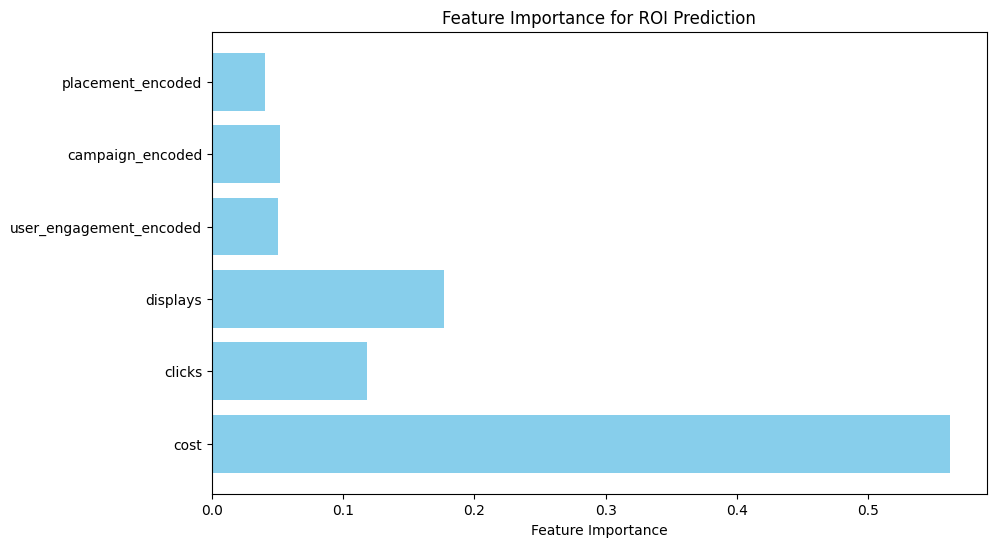

In [179]:
# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for ROI Prediction')
plt.show()

**Model Tuning**

In [180]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Set up the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': np.arange(2, 20, 1),
    'min_samples_leaf': np.arange(1, 20, 1),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [181]:
# Set up RandomizedSearchCV with 5-fold cross-validation and 100 iterations
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2)

# Fit RandomizedSearchCV to find the best parameters
random_search.fit(X_train, y_train)

# Best model from RandomizedSearchCV
best_model = random_search.best_estimator_



Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\adeye\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



In [182]:
# Evaluate the model using cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# RMSE for Cross-validation
cv_rmse = np.sqrt(-cv_scores)
print("Cross-validation RMSE:", cv_rmse.mean())

# Predict ROI on the test set using the best model
y_pred = best_model.predict(X_test)

c:\Users\adeye\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

c:\Users\adeye\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

c:\Users\adeye\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors a

Cross-validation RMSE: 97.87385536716998


In [183]:
# Model evaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² score

# Print the evaluation metrics
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 69.27493685626963
R² Score: 0.5612028812708014


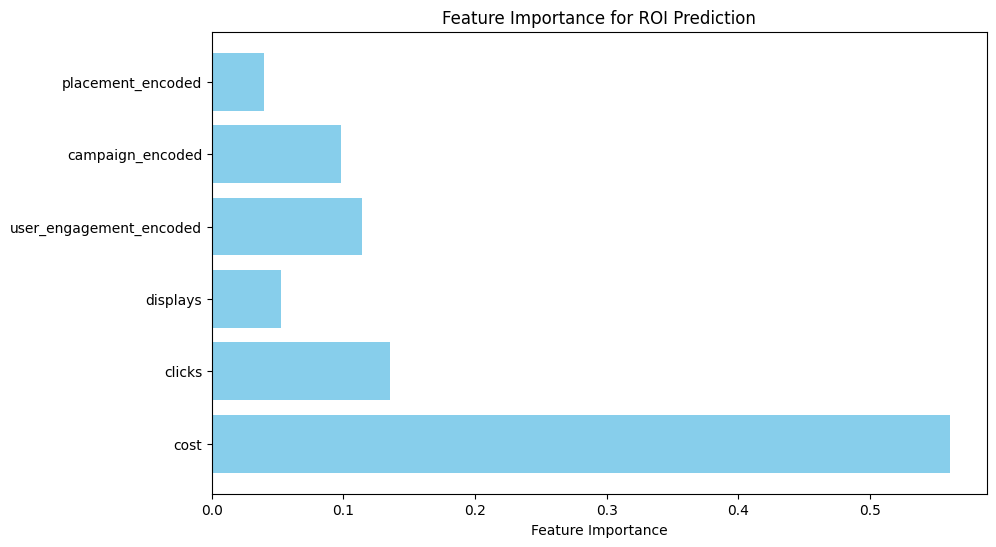

In [184]:
# Feature Importance: Analyze which features contribute most to ROI prediction
importances = best_model.feature_importances_
features = X.columns

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for ROI Prediction')
plt.show()

In [185]:
# Save the trained model to a file
joblib.dump(best_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

**Take user input and predict ROI for campaign 1, other inut are the same**

In [ ]:
X # displays the dependent variables for the model

,cost,clicks,displays,user_engagement_encoded,campaign_encoded,placement_encoded
0,0.0060,0,4,0,0,0
1,26.7824,158,20170,0,0,1
2,27.6304,158,14701,0,0,2
3,216.8750,1796,171259,0,0,4
4,0.0670,1,552,1,0,1
...,...,...,...,...,...,...
15397,0.5138,6,911,2,2,0
15398,0.7884,40,5963,2,2,1
15399,0.9867,22,710,2,2,2
15400,0.1686,8,490,2,2,3


**Take user input and predict ROI for campaign 1. cost = 100, clicks = 1000, displays = 650, user enagagement = 450, placement = ghi, campaign = camp 1**

In [188]:
# Load the saved model from file
model = joblib.load('random_forest_model.pkl')

# Function to predict ROI based on user input
def predict_roi():
    # Taking user input
    cost = float(input("Enter the cost: "))
    clicks = int(input("Enter the number of clicks: "))
    displays = int(input("Enter the number of displays: "))
    user_engagement = input("Enter the user engagement (High, Low, Medium): ")  # Updated for user-friendly input
    campaign = input("Enter the campaign name (camp 1, camp 2, camp 3): ")  # Updated for correct campaign names
    placement = input("Enter the placement name (abc, def, ghi, jkl, mno): ")

    # Encoding the categorical features (campaign, placement, user_engagement) inside the function
    campaign_mapping = {'camp 1': 0, 'camp 2': 1, 'camp 3': 2}  # Corrected campaign mapping
    placement_mapping = {'abc': 0, 'def': 1, 'ghi': 2, 'jkl': 3, 'mno': 4}
    user_engagement_mapping = {'High': 0, 'Low': 1, 'Medium': 2}

    # Validate user inputs and encode
    if campaign not in campaign_mapping:
        print("Invalid campaign name! Please enter one of the valid campaign names (camp 1, camp 2, camp 3).")
        return
    if placement not in placement_mapping:
        print("Invalid placement name! Please enter one of the valid placement names (abc, def, ghi, jkl, mno).")
        return
    if user_engagement not in user_engagement_mapping:
        print("Invalid user engagement! Please enter one of the valid values (High, Low, Medium).")
        return

    # Map the user input to encoded values
    campaign_encoded = campaign_mapping[campaign]
    placement_encoded = placement_mapping[placement]
    user_engagement_encoded = user_engagement_mapping[user_engagement]

    # Prepare the features array in the same order as the model was trained
    features = np.array([[cost, clicks, displays, user_engagement_encoded, campaign_encoded, placement_encoded]])

    # Predict ROI using the trained model
    roi_pred = model.predict(features)

    # Display the predicted ROI
    print(f"Predicted ROI: {roi_pred[0]}")

# Run the function to predict ROI
predict_roi()

Predicted ROI: 188.65459137512994


c:\Users\adeye\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



**Take user input and predict ROI for campaign 2 , cost = 100, clicks = 1000, displays = 650, user enagagement = 450, placement = ghi, campaign = camp 1.  other input are the same**

In [189]:
# Load the saved model from file
model = joblib.load('random_forest_model.pkl')

# Function to predict ROI based on user input
def predict_roi():
    # Taking user input
    cost = float(input("Enter the cost: "))
    clicks = int(input("Enter the number of clicks: "))
    displays = int(input("Enter the number of displays: "))
    user_engagement = input("Enter the user engagement (High, Low, Medium): ")  # Updated for user-friendly input
    campaign = input("Enter the campaign name (camp 1, camp 2, camp 3): ")  # Updated for correct campaign names
    placement = input("Enter the placement name (abc, def, ghi, jkl, mno): ")

    # Encoding the categorical features (campaign, placement, user_engagement) inside the function
    campaign_mapping = {'camp 1': 0, 'camp 2': 1, 'camp 3': 2}  # Corrected campaign mapping
    placement_mapping = {'abc': 0, 'def': 1, 'ghi': 2, 'jkl': 3, 'mno': 4}
    user_engagement_mapping = {'High': 0, 'Low': 1, 'Medium': 2}

    # Validate user inputs and encode
    if campaign not in campaign_mapping:
        print("Invalid campaign name! Please enter one of the valid campaign names (camp 1, camp 2, camp 3).")
        return
    if placement not in placement_mapping:
        print("Invalid placement name! Please enter one of the valid placement names (abc, def, ghi, jkl, mno).")
        return
    if user_engagement not in user_engagement_mapping:
        print("Invalid user engagement! Please enter one of the valid values (High, Low, Medium).")
        return

    # Map the user input to encoded values
    campaign_encoded = campaign_mapping[campaign]
    placement_encoded = placement_mapping[placement]
    user_engagement_encoded = user_engagement_mapping[user_engagement]

    # Prepare the features array in the same order as the model was trained
    features = np.array([[cost, clicks, displays, user_engagement_encoded, campaign_encoded, placement_encoded]])

    # Predict ROI using the trained model
    roi_pred = model.predict(features)

    # Display the predicted ROI
    print(f"Predicted ROI: {roi_pred[0]}")

# Run the function to predict ROI
predict_roi()

Predicted ROI: 168.29312241263025


c:\Users\adeye\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [191]:
y

0          0.000000
1         70.996753
2         87.224195
3        113.025007
4          0.000000
            ...    
15397      0.000000
15398     38.819951
15399      0.000000
15400      0.000000
15401      0.000000
Name: ROI, Length: 14926, dtype: float64

In [116]:
np.max(y)

8894.798968103463

In [117]:
np.min(y)

0.0

In [ ]:
range = np.max(y) - np.min(y)
range # display range of ROI to evaluate the RMSE of 69 which is small error considering the range of ROI.

8894.798968103463

In [118]:
y

0          0.000000
1         70.996753
2         87.224195
3        113.025007
4          0.000000
            ...    
15403      0.000000
15404     72.450441
15405      0.000000
15406      0.000000
15407     83.754854
Name: ROI, Length: 14931, dtype: float64